# Breast cancer predicting model - ML

Based on this dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

> This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

> Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# 0 - Intro

> **I started studying Machine learning in Nov/2020 and this is my very first analysis.
> All constructive comments will be appreciated.**


**My main objective is to build 5 models of machine learning and 1 model of deep learning to predict if the tumor is a benign one or not.
Besides, I am going to do the tuning of parameters of each model to get a better accuracy.
Then, I perform the comparison of accuracy between these models.**


**Table of contents**

* [1 - Exploratory data analysis](#1-Exploratory-Data-Analysis)
* [2 - Dataset preparation](#2-Dataset-Preparation)
* [3 - Create train and test datasets](#3-Create-Train-And-Test-Datasets)
* [4 - Models](#4-Models)
    - [4.1 - SVM](#4.1-SVM)
        - [4.1.1 - SVM - Build a model with default parameters](#4.1.1-Build-A-Model-With-Default-Parameters)
        - [4.1.2 - SVM - Parameters tuning](#4.1.2-Parameters-Tuning)
        - [4.1.3 - SVM - Confusion Matrix](#4.1.3-Confusion-Matrix)
        - [4.1.4 - SVM - Importance of each feature](#4.1.4-Importance-Of-Each-Feature)
        - [4.1.5 - SVM - Cross Validation](#4.1.5-Cross-Validation)
    - [4.2 - Decision Tree](#4.2-Decision-Tree)
        - [4.2.1 - Decision Tree - Build a model with default parameters](#4.2.1-Build-A-Model-With-Default-Parameters)
        - [4.2.2 - Decision Tree - Parameters tuning](#4.2.2-Parameters-Tuning)
        - [4.2.3 - Decision Tree - Confusion Matrix](#4.2.3-Confusion-Matrix)
        - [4.2.4 - Decision Tree - Importance of each feature](#4.2.4-Importance-Of-Each-Feature)
        - [4.2.5 - Decision Tree - Cross Validation](#4.2.5-Cross-Validation)
    - [4.3 - Logistic regression](#4.3-Logistic-Regression)
        - [4.3.1 - Logistic Regression - Build a model with default parameters](#4.3.1-Build-A-Model-With-Default-Parameters)
        - [4.3.2 - Logistic Regression - Parameters tuning](#4.3.2-Parameters-Tuning)
        - [4.3.3 - Logistic Regression - Confusion Matrix](#4.3.3-Confusion-Matrix)
        - [4.3.4 - Logistic Regression - Importance of each feature](#4.3.4-Importance-Of-Each-Feature)
        - [4.3.5 - Ligistic Regression - Cross Validation](#4.3.5-Cross-Validation)
    - [4.4 - Random forest](#4.4-Random-Forest)
        - [4.4.1 - Random Forest - Build a model with default parameters](#4.4.1-Build-A-Model-With-Default-Parameters)
        - [4.4.2 - Random Forest - Parameters tuning](#4.4.2-Parameters-Tuning)
        - [4.4.3 - Random Forest - Confusion Matrix](#4.4.3-Confusion-Matrix)
        - [4.4.4 - Random Forest - Importance of each feature](#4.4.4-Importance-Of-Each-Feature)
        - [4.4.5 - Random Forest - Cross Validation](#4.4.5-Cross-Validation)
    - [4.5 - KNN](#4.5-KNN)
        - [4.5.1 - KNN - Build a model with default parameters](#4.5.1-Build-A-Model-With-Default-Parameters)
        - [4.5.2 - KNN - Parameters tuning](#4.5.2-Parameters-Tuning)
        - [4.5.3 - KNN - Confusion Matrix](#4.5.3-Confusion-Matrix)
        - [4.5.4 - KNN - Importance of each feature](#4.5.4-Importance-Of-Each-Feature)
        - [4.5.5 - KNN - Cross Validation](#4.5.5-Cross-Validation)
* [5 - Deep learning - Tensorflow and Keras](#5-Deep-Learning-TensorFlow-And-Keras)
    - [5.1 - Using test_split](#5.1-Using-Test-Split)
    - [5.2 - Using cross validation](#5.2-Using-Cross-Validation)
* [6 - Conclusion](#6-Conclusion)
* [7 - Appendix](#7-Appendix)

<a id="1-Exploratory-Data-Analysis"></a>
# 1 - Exploratory data analysis

 **Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign) 

3)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,confusion_matrix, accuracy_score, plot_confusion_matrix #utilizada para verificar a acurácia do modelo construído
from sklearn.svm import SVC #utilizada para importar o algoritmo SVM
#from sklearn.linear_model import LinearRegression
#import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
#Necessary functions 
def DisplayConfusionMatrix(_classifier, _title):
    df_cm_svm = pd.DataFrame(_classifier, index = [i for i in "01"],columns = [i for i in "01"])
    disp = plot_confusion_matrix(_classifier, x_test, y_test,
                                 display_labels = ['Benign','Malignant'],
                                 cmap = plt.cm.Blues,
                                 normalize = None)
    disp.ax_.set_title(_title)

    #print(_title)
    #print(disp.confusion_matrix)

#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

def DisplayConfusionMatrix_2(_y_pred, _title):
    matrix = confusion_matrix(y_test, _y_pred)
    #matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  # if we want %

    # Build the plot
    plt.figure(figsize=(7,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Benign','Malignant']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(_title)
    plt.show()
    
def FeatureImportance (_model):
    fi = pd.DataFrame({'feature': list(x_train.columns),
                       'importance': _model.feature_importances_}).sort_values('importance', ascending = False)
    return fi

In [3]:
#Gets de dataset as a DataFrame
ds = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [4]:
ds.shape

(569, 33)

The dataset contains 33 columns and 569 records.
Each record corresponds to  

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
ds.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


We can consider that the data of the column "diagnosis" is balanced

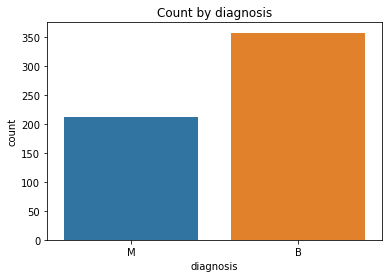

In [9]:
sns.countplot(data=ds, x='diagnosis')
plt.title('Count by diagnosis')
plt.show()

<a id="2-Dataset-Preparation"></a>
# 2 - Dataset preparation

In [10]:
# Transform the class column (diagnosis) into a int64
# 0 = Benign
# 1 = Malignant

#ds.diagnosis = ds.diagnosis == 'M'
#ds.diagnosis = ds.diagnosis.astype('int')
# OR
ds['diagnosis'] = ds['diagnosis'].map({'M':1,'B':0})

In [11]:
# Drop columns "id" and "Unnamed: 32"
ds.drop(['id','Unnamed: 32'], axis= 1, inplace=True)

<a id="3-Create-Train-And-Test-Datasets"></a>
# 3 - Create train and test datasets

In [12]:
# Create different arrays for features and target
x = ds.iloc[:, 1:-1]
y = ds.iloc[:, 0]

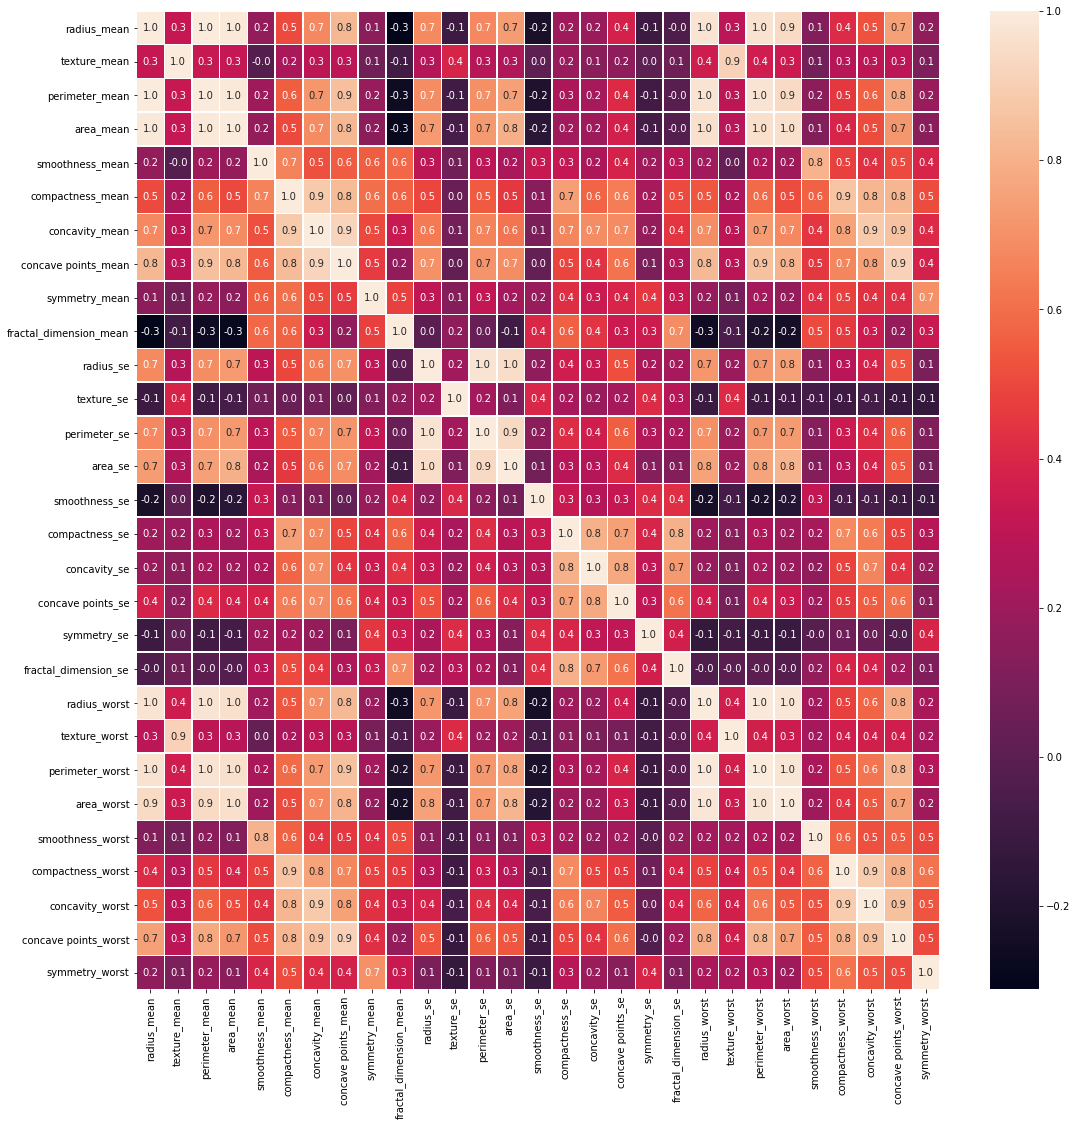

In [13]:
# Correlation between all features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#As we can see, there are many features that are strongly correlated. I decided to use all features.
#To be done: eliminate unuseful features

* Let's split the dataset:

    1. 80% for training the model
    2. 20% for testing the model

In [14]:
# Create train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

<a id="4-Models"></a>
# 4 - Models

<a id="4.1-SVM"></a>
# 4.1 - SVM

<a id="4.1.1-Build-A-Model-With-Default-Parameters"></a>
# 4.1.1 - SVM - Build a model with default parameters

In [15]:
modelSVM = SVC(kernel = 'linear')
modelSVM.fit(x_train, y_train)
labels_svm = modelSVM.predict(x_test)
score_svm = modelSVM.score(x_test, y_test)
print("Score (SVM): %f" % score_svm)
conf_mx_svm = confusion_matrix(y_test, labels_svm)
scores = [score_svm]

Score (SVM): 0.929825


<a id="4.1.2-Parameters-Tuning"></a>
# 4.1.2 - SVM - Parameters tuning

In [16]:
params_svm = {'kernel' : ['linear', 'rbf'],   #not used: poly, precomputed and sigmoid
              'gamma' : ['scale', 'auto']}
grid_search_svm = GridSearchCV(estimator = modelSVM,
                           param_grid = params_svm,
                           scoring = 'accuracy',
                           cv = 5)
grid_search_svm = grid_search_svm.fit(x, y)
print(f'The best parameters for SVM are: "{grid_search_svm.best_params_}" and this model can explain the dataset with an accuracy of {str(np.round(grid_search_svm.best_score_ * 100,2))} %')
scores.append(grid_search_svm.best_score_)

The best parameters for SVM are: "{'gamma': 'scale', 'kernel': 'linear'}" and this model can explain the dataset with an accuracy of 94.73 %


<a id="4.1.3-Confusion-Matrix"></a>
# 4.1.3 - SVM - Confusion Matrix

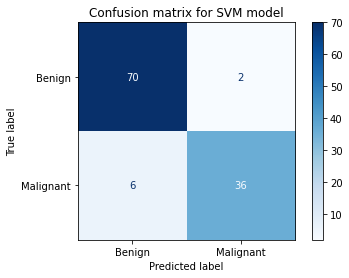

In [17]:
DisplayConfusionMatrix(modelSVM,"Confusion matrix for SVM model")

<a id="4.1.4-Importance-Of-Each-Feature"></a>
# 4.1.4 - SVM - Importance of each feature

In [18]:
#To be implemented

#FeatureImportance(modelSVM)
#def f_importances(coef, names):
#    imp = coef
#    imp,names = zip(*sorted(zip(imp,names)))
#    plt.barh(range(len(names)), imp, align='center')
#    plt.yticks(range(len(names)), names)
#    plt.show()

#features_names
#f_importances(modelSVM.coef_, features_names)
#modelSVM.coef_

<a id="4.1.5-Cross-Validation"></a>
# 4.1.5 - SVM - Cross Validation

In [19]:
#Cross validation for SVM with default hyper parameters
svm_cv_default = cross_val_score(estimator = modelSVM,
                             X = x, y = y,
                             cv = 10, scoring = 'accuracy')
score_svm_default_cv = svm_cv_default.mean()
print("Score (SVM default CV): %f" % score_svm_default_cv)
scores_cv = [score_svm_default_cv]

Score (SVM default CV): 0.952569


<a id="4.2-Decision-Tree"></a>
# 4.2 - Decision Tree

<a id="4.2.1-Build-A-Model-With-Default-Parameters"></a>
# 4.2.1 - Decision Tree - Build a model with default parameters

In [20]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
labels_tree = tree.predict(x_test)
score_tree = tree.score(x_test, y_test)
print("Score (Decision tree): %f" % score_tree)
conf_mx_tree = confusion_matrix(y_test, labels_tree)
#accuracia = accuracy_score(y_test, labels_tree)
#print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")
scores.append(score_tree)

Score (Decision tree): 0.947368


<a id="4.2.2-Parameters-Tuning"></a>
# 4.2.2 - Decision Tree - Parameters tuning

In [21]:
params_tree = {'criterion' : ['gini', 'entropy'],
               'max_depth' : range(1,10)}
grid_search_tree = GridSearchCV(estimator = tree,
                           param_grid = params_tree,
                           scoring = 'accuracy',
                           cv = 5)
grid_search_tree = grid_search_tree.fit(x, y)
print(f'The best parameters for Decision Tree are: "{grid_search_tree.best_params_}" and this model can explain the dataset with an accuracy of {str(np.round(grid_search_tree.best_score_ * 100,2))} %')
scores.append(grid_search_tree.best_score_)

The best parameters for Decision Tree are: "{'criterion': 'entropy', 'max_depth': 4}" and this model can explain the dataset with an accuracy of 93.67 %


<a id="4.2.3-Confusion-Matrix"></a>
# 4.2.3 - Decision Tree - Confusion Matrix

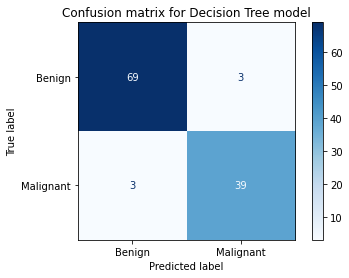

In [22]:
DisplayConfusionMatrix(tree,"Confusion matrix for Decision Tree model")

<a id="4.2.4-Importance-Of-Each-Feature"></a>
# 4.2.4 - Decision Tree - Importance of each feature

In [23]:
FeatureImportance(tree)

,feature,importance
22,perimeter_worst,0.723157
27,concave points_worst,0.067700
24,smoothness_worst,0.040833
1,texture_mean,0.035412
3,area_mean,0.027148
21,texture_worst,0.018744
6,concavity_mean,0.017530
12,perimeter_se,0.016841
23,area_worst,0.015606
7,concave points_mean,0.013416


<a id="4.2.5-Cross-Validation"></a>
# 4.2.5 - Decision Tree - Cross Validation

In [24]:
#Cross validation for Decision Tree with default hyper parameters
tree_cv_default = cross_val_score(estimator = tree,
                             X = x, y = y,
                             cv = 10, scoring = 'accuracy')
score_tree_default_cv = tree_cv_default.mean()
print("Score (Decision Tree default CV): %f" % score_tree_default_cv)
scores_cv.append(score_tree_default_cv)

Score (Decision Tree default CV): 0.920865


<a id="4.3-Logistic-Regression"></a>
# 4.3 - Logistic regression

<a id="4.3.1-Build-A-Model-With-Default-Parameters"></a>
# 4.3.1 - Logistic Regression - Build a model with default parameters

In [25]:
logreg = LogisticRegression(max_iter=3000)
logreg.fit(x_train, y_train)
labels_logreg = logreg.predict(x_test)
conf_mx_logreg = confusion_matrix(y_test, labels_logreg)
score_lr = logreg.score(x_test, y_test)
print("Score (Logistic Regression): %f" % score_lr)
scores.append(score_lr)

Score (Logistic Regression): 0.938596


<a id="4.3.2-Parameters-Tuning"></a>
# 4.3.2 - Logistic Regression - Parameters tuning

In [26]:
params_logreg = {"solver":[ 'newton-cg', 'liblinear', 'sag', 'saga'],  #not used: 'lbfgs'
                 "max_iter" : [10000]}
grid_search_logreg = GridSearchCV(estimator = logreg,
                           param_grid = params_logreg,
                           scoring = 'accuracy',
                           cv = 5)
grid_search_logreg = grid_search_logreg.fit(x, y)
scores.append(grid_search_logreg.best_score_)
print(f'The best parameters for Logistic Regression are: "{grid_search_logreg.best_params_}" and this model can explain the dataset with an accuracy of {str(np.round(grid_search_logreg.best_score_ * 100,2))} %')

The best parameters for Logistic Regression are: "{'max_iter': 10000, 'solver': 'liblinear'}" and this model can explain the dataset with an accuracy of 95.08 %


<a id="4.3.3-Confusion-Matrix"></a>
# 4.3.3 - Logistic Regression - Confusion Matrix

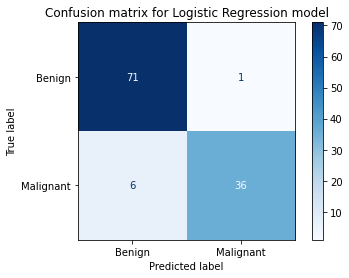

In [27]:
DisplayConfusionMatrix(logreg,"Confusion matrix for Logistic Regression model")

<a id="4.3.4-Importance-Of-Each-Feature"></a>
# 4.3.4 - Logistic Regression - Importance of each feature

In [28]:
#To be implemented

<a id="4.3.5-Cross-Validation"></a>
# 4.3.5 - Logistic Regression - Cross Validation

In [29]:
#Cross validation for Logistic Regression with default hyper parameters
logreg_cv_default = cross_val_score(estimator = logreg,
                             X = x, y = y,
                             cv = 10, scoring = 'accuracy')
score_logreg_default_cv = logreg_cv_default.mean()
print("Score (Logistic Regression default CV): %f" % score_logreg_default_cv)
scores_cv.append(score_logreg_default_cv)

Score (Logistic Regression default CV): 0.954323


<a id="4.4-Random-Forest"></a>
# 4.4 - Random forest

<a id="4.4.1-Build-A-Model-With-Default-Parameters"></a>
# 4.4.1 - Random Forest - Build a model with default parameters

In [30]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
labels_rf = forest.predict(x_test)
conf_mx_rf = confusion_matrix(y_test, labels_rf)
score_rf = forest.score(x_test, y_test)
print("Score (Random forest): %f" % score_rf)
scores.append(score_rf)

Score (Random forest): 0.964912


<a id="4.4.2-Parameters-Tuning"></a>
# 4.4.2 - Random Forest - Parameters tuning

In [31]:
params_rf = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
  #  'max_depth' : ['none', 4,5,6,7,8],
    'criterion' : ['gini', 'entropy']
}

#params_rf = {"criterion":['gini'], "n_estimators" : range(60,110)}

grid_search_rf = GridSearchCV(estimator = forest,
                           param_grid = params_rf,
                           scoring = 'accuracy',
                           cv = 5)
grid_search_rf = grid_search_rf.fit(x, y)
scores.append(grid_search_rf.best_score_)
print(f'The best parameters for Random Forest are: "{grid_search_rf.best_params_}" and this model can explain the dataset with an accuracy of {str(np.round(grid_search_rf.best_score_ * 100,2))} %')

The best parameters for Random Forest are: "{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}" and this model can explain the dataset with an accuracy of 97.01 %


<a id="4.4.3-Confusion-Matrix"></a>
# 4.4.3 - Random Forest - Confusion Matrix

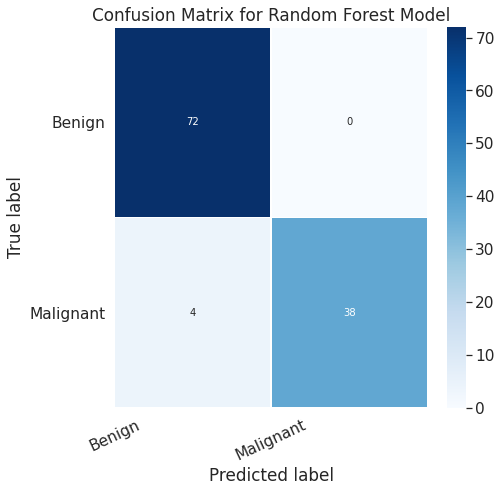

In [32]:
DisplayConfusionMatrix_2(labels_rf, 'Confusion Matrix for Random Forest Model')

<a id="4.4.4-Importance-Of-Each-Feature"></a>
# 4.4.4 - Random Forest - Importance of each feature

In [33]:
FeatureImportance(forest)

,feature,importance
22,perimeter_worst,0.165744
27,concave points_worst,0.120331
20,radius_worst,0.106760
7,concave points_mean,0.098364
23,area_worst,0.081704
3,area_mean,0.068966
2,perimeter_mean,0.057193
0,radius_mean,0.043381
26,concavity_worst,0.033365
13,area_se,0.032180


<a id="4.4.5-Cross-Validation"></a>
# 4.4.5 - Random Forest - Cross Validation

In [34]:
#Cross validation for Random Fores with default hyper parameters
rf_cv_default = cross_val_score(estimator = forest,
                             X = x, y = y,
                             cv = 10, scoring = 'accuracy')
score_rf_default_cv = rf_cv_default.mean()
print("Score (Radom Forest default CV): %f" % score_rf_default_cv)
scores_cv.append(score_rf_default_cv)

Score (Radom Forest default CV): 0.959649


<a id="4.5-KNN"></a>
# 4.5 - KNN

<a id="4.5.1-Build-A-Model-With-Default-Parameters"></a>
# 4.5.1 - KNN - Build a model with default parameters

In [35]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
labels_knn = knn.predict(x_test)
score_knn = knn.score(x_test, y_test)
print("Score (KNN): %f" % score_knn)
conf_mx_knn = confusion_matrix(y_test, labels_knn)
scores.append(score_knn)
#print("R2 Score %f " % r2_score(y_test, labels_knn))
#knn.score(x_test, y_test) , np.mean(labels_knn == y_test), (labels_knn == y_test).sum() / len(x_test), "R2 Score %f " % r2_score(y_test, labels_knn)

Score (KNN): 0.921053


<a id="4.5.2-Parameters-Tuning"></a>
# 4.5.2 - KNN - Parameters tuning

In [36]:
params_knn = {'n_neighbors': [5,7,9,11,13,15,17,19,21],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights' : ['uniform', 'distance']}
grid_search_knn = GridSearchCV(estimator = knn,
                           param_grid = params_knn,
                           scoring = 'accuracy',
                           cv = 5)
grid_search_knn = grid_search_knn.fit(x, y)
print(f'The best parameters for KNN are: "{grid_search_knn.best_params_}" and this model can explain the dataset with an accuracy of {str(np.round(grid_search_knn.best_score_ * 100,2))} %')
scores.append(grid_search_knn.best_score_)

The best parameters for KNN are: "{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'}" and this model can explain the dataset with an accuracy of 93.32 %


<a id="4.5.3-Confusion-Matrix"></a>
# 4.5.3 - KNN - Confusion Matrix

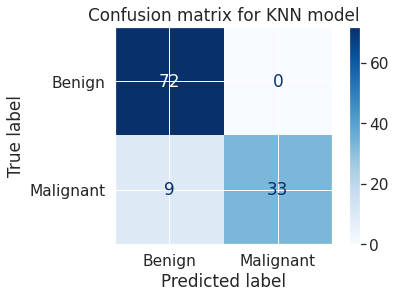

In [37]:
DisplayConfusionMatrix(knn,"Confusion matrix for KNN model")

<a id="4.5.4-Importance-Of-Each-Feature"></a>
# 4.5.4 - KNN - Importance of each feature

In [38]:
#To be implemented

<a id="4.5.5-Cross-Validation"></a>
# 4.5.5 - KNN - Cross Validation

In [39]:
#Cross validation for KNN with default hyper parameters
knn_cv_default = cross_val_score(estimator = knn,
                             X = x, y = y,
                             cv = 10, scoring = 'accuracy')
score_knn_default_cv = knn_cv_default.mean()
print("Score (KNN default CV): %f" % score_knn_default_cv)
scores_cv.append(score_knn_default_cv)

Score (KNN default CV): 0.922713


<a id="5-Deep-Learning-TensorFlow-And-Keras"></a>
# 5 - Deep learning - Tensorflow and Keras

"Deep Learning com Python de A a Z - O Curso Completo" - https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/
Udemy course from https://iaexpert.academy/



TBD - Parameteres tuning

<a id="5.1-Using-Test-Split"></a>
# 5.1 - Using test_split

In [40]:
classifier_split = Sequential()
#classifier_split.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 29))
classifier_split.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal', input_dim = 29))
#classifier_split.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))
classifier_split.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal'))
classifier_split.add(Dense(units = 1, activation = 'sigmoid'))

otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
classifier_split.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

# Fit model
classifier_split.fit(x_train, y_train,
                  batch_size = 10, epochs = 100, verbose = 0)
# Predict
labels_rn_split = classifier_split.predict(x_test)
labels_rn_split = (labels_rn_split > 0.5)

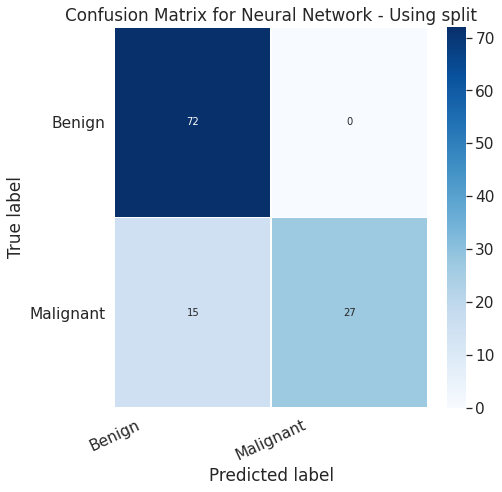

In [41]:
DisplayConfusionMatrix_2(labels_rn_split, 'Confusion Matrix for Neural Network - Using split')

In [42]:
precision = accuracy_score(y_test, labels_rn_split)
print(precision)
scores.append(precision)
resultado = classifier_split.evaluate(x_test, y_test)

0.868421052631579
4/4 [==============================] - 0s 1ms/step - loss: 0.7294 - binary_accuracy: 0.8684


<a id="5.2-Using-Cross-Validation"></a>
# 5.2 - Using cross validation

In [43]:
previsores = x
classe = y

def createNeuralNetwork():
    classifier_cv = Sequential()
    classifier_cv.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal', input_dim = 29))
    #classifier_cv.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 29))
    classifier_cv.add(Dropout(0.2))
    classifier_cv.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'normal'))
    #classifier_cv.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))
    classifier_cv.add(Dropout(0.2))
    classifier_cv.add(Dense(units = 1, activation = 'sigmoid'))
    otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    classifier_cv.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classifier_cv

In [44]:
classifier_cv = KerasClassifier(build_fn = createNeuralNetwork,
                                epochs = 100,
                                batch_size = 10, verbose = 0)
labels_rn_cv = cross_val_score(estimator = classifier_cv,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')

In [45]:
mean = labels_rn_cv.mean()
scores.append(mean)
scores_cv.append(mean)
stddev = labels_rn_cv.std()
print(mean)
print(stddev)

0.9016290726817042
0.04905258778458605


<a id="6-Conclusion"></a>
# 6 - Conclusion

In [46]:
models = ['SVM', 'SVM tunned','Decision tree','Decision tree tunned','Logistic regression','Logistic regression tunned', 'Random forest','Random forest tunned','KNN','KNN tunned', 'Neural network using split', 'Neural network using cross validation']
df_scores = pd.DataFrame({'Model': models,
                       'Score': scores}).sort_values(['Score', 'Model'],ascending = [False, True])
df_scores

,Model,Score
7,Random forest tunned,0.970129
6,Random forest,0.964912
5,Logistic regression tunned,0.950815
2,Decision tree,0.947368
1,SVM tunned,0.947306
4,Logistic regression,0.938596
3,Decision tree tunned,0.936749
9,KNN tunned,0.933240
0,SVM,0.929825
8,KNN,0.921053


In [47]:
#models_cv = ['SVM CV', 'SVM tunned CV','Decision tree CV','Decision tree tunned CV','Logistic regression CV','Logistic regression tunned CV', 'Random forest CV','Random forest tunned CV','KNN CV','KNN tunned CV', 'Neural network using CV']
models_cv = ['SVM CV','Decision tree CV','Logistic regression CV','Random forest CV','KNN CV','Neural network using CV']
df_scores_cv = pd.DataFrame({'Model CV': models_cv,
                       'Score CV': scores_cv}).sort_values(['Score CV', 'Model CV'],ascending = [False, True])
df_scores_cv

,Model CV,Score CV
3,Random forest CV,0.959649
2,Logistic regression CV,0.954323
0,SVM CV,0.952569
4,KNN CV,0.922713
1,Decision tree CV,0.920865
5,Neural network using CV,0.901629


In [48]:
best_model = df_scores.iloc[0]
#type(best_model.Score)
print(f'We can conclude that "{best_model.Model}" model can explain this dataset with an accuracy of {str(np.round(best_model.Score * 100,2))} %')

We can conclude that "Random forest tunned" model can explain this dataset with an accuracy of 97.01 %


<a id="7-Appendix"></a>
# 7 - Appendix

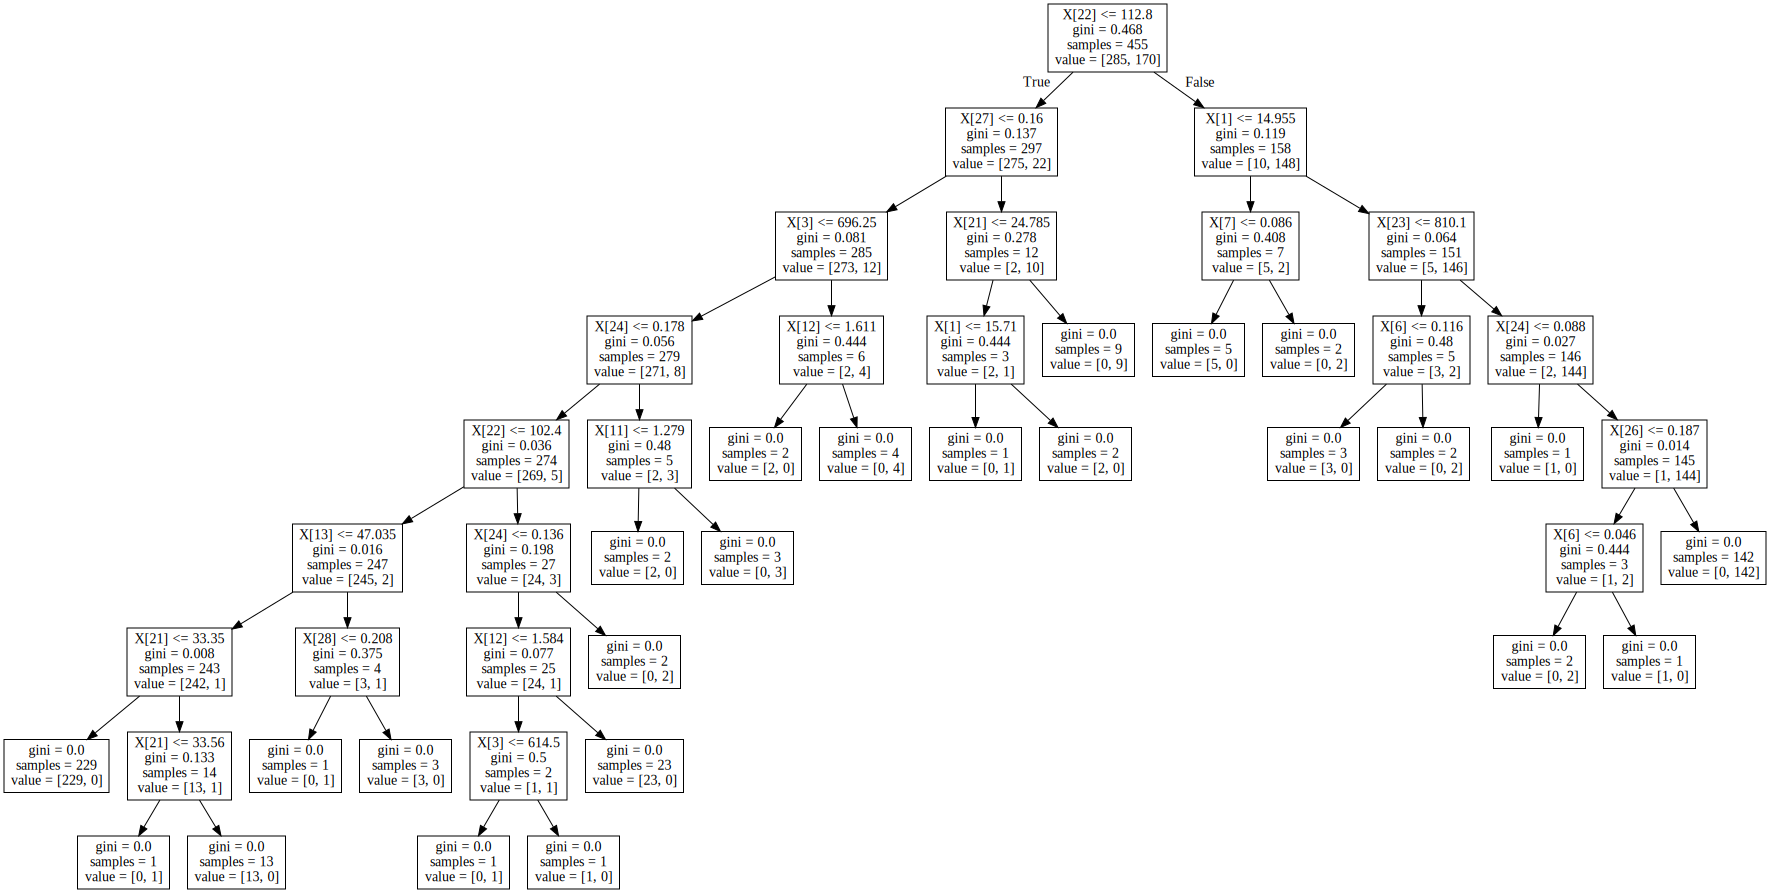

In [49]:
# Graphical representation for Decision tree
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)